# Exploring Clustering Techniques with Python Assignment Day 38

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import (
  AgglomerativeClustering,
  KMeans,
)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA

In [ ]:
#load data
df_flight = pd.read_csv('/content/drive/MyDrive/DATA SET/flight.csv')

In [ ]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df_flight.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
df_flight.isnull().sum()

,0
MEMBER_NO,0
FFP_DATE,0
FIRST_FLIGHT_DATE,0
GENDER,3
FFP_TIER,0
WORK_CITY,2269
WORK_PROVINCE,3248
WORK_COUNTRY,26
AGE,420
LOAD_TIME,0


In [ ]:
# Drop kolom identitas dan non-numeric
drop_cols = ['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER',
             'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY',
             'LOAD_TIME', 'LAST_FLIGHT_DATE']
df_flight_clean = df_flight.drop(columns=drop_cols)

In [ ]:
df_flight_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FFP_TIER         62988 non-null  int64  
 1   AGE              62568 non-null  float64
 2   FLIGHT_COUNT     62988 non-null  int64  
 3   BP_SUM           62988 non-null  int64  
 4   SUM_YR_1         62437 non-null  float64
 5   SUM_YR_2         62850 non-null  float64
 6   SEG_KM_SUM       62988 non-null  int64  
 7   LAST_TO_END      62988 non-null  int64  
 8   AVG_INTERVAL     62988 non-null  float64
 9   MAX_INTERVAL     62988 non-null  int64  
 10  EXCHANGE_COUNT   62988 non-null  int64  
 11  avg_discount     62988 non-null  float64
 12  Points_Sum       62988 non-null  int64  
 13  Point_NotFlight  62988 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 6.7 MB


# Prepocessing

## Duplicates

In [ ]:
df_flight_clean.duplicated().sum()

np.int64(11)

In [ ]:
df_flight_clean.drop_duplicates(inplace=True)

In [ ]:
df_flight_clean.duplicated().sum()

np.int64(0)

In [ ]:
df_flight_clean.describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62977.000000,62557.000000,62977.000000,62977.000000,62426.000000,62839.000000,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000
mean,4.102180,42.475295,11.841085,10926.271782,5356.020573,5604.800442,17125.490274,176.074964,67.755098,166.056132,0.319831,0.721567,12547.241183,2.728615
std,0.373886,9.884627,14.050126,16340.550553,8109.985746,8703.889269,20962.030336,183.780158,77.516091,123.391708,1.136096,0.185434,20509.218911,7.364723
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,781.000000,4748.000000,29.000000,23.375000,79.000000,0.000000,0.612006,2776.000000,0.000000
50%,4.000000,41.000000,7.000000,5701.000000,2800.000000,2773.000000,9995.000000,107.000000,44.666667,143.000000,0.000000,0.711872,6330.000000,0.000000
75%,4.000000,48.000000,15.000000,12832.000000,6575.000000,6848.500000,21272.000000,267.000000,82.000000,228.000000,0.000000,0.809487,14304.000000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


## Handling missing Value

In [ ]:
# checking missing value semua kolom
for column in df_flight.columns:
    print(f"============= {column} =================")
    display(df_flight[column].value_counts())
    print()

============= MEMBER_NO =================


,count
MEMBER_NO,
61340,1
54993,1
28065,1
55106,1
21189,1
...,...
8253,1
1254,1
57881,1



============= FFP_DATE =================


,count
FFP_DATE,
1/13/2011,184
1/1/2013,165
3/1/2013,100
11/17/2010,99
1/14/2011,95
...,...
2/6/2006,1
12/27/2004,1
11/15/2004,1



============= FIRST_FLIGHT_DATE =================


,count
FIRST_FLIGHT_DATE,
2/16/2013,96
9/30/2012,85
2/15/2013,84
9/9/2005,78
4/21/2012,70
...,...
12/20/2004,1
2/13/2014,1
3/30/2014,1



============= GENDER =================


,count
GENDER,
Male,48134
Female,14851



============= FFP_TIER =================


,count
FFP_TIER,
4,58066
5,3409
6,1513



============= WORK_CITY =================


,count
WORK_CITY,
guangzhou,9386
beijing,7845
shanghai,5001
shenzhen,3605
dalian,1979
...,...
MIZUMA-GUN,1
helan,1
PJ,1



============= WORK_PROVINCE =================


,count
WORK_PROVINCE,
guangdong,17509
beijing,8014
shanghai,4998
liaoning,4182
xinjiang,2512
...,...
SAN JOSE,1
GUANGZHOU,1
Naples,1



============= WORK_COUNTRY =================


,count
WORK_COUNTRY,
CN,57748
HK,991
JP,875
KR,790
US,575
...,...
cn,1
IA,1
BG,1



============= AGE =================


,count
AGE,
47.0,2727
38.0,2713
37.0,2683
42.0,2622
39.0,2595
...,...
7.0,1
6.0,1
87.0,1



============= LOAD_TIME =================


,count
LOAD_TIME,
3/31/2014,62988



============= FLIGHT_COUNT =================


,count
FLIGHT_COUNT,
2,10394
3,6477
4,5494
5,4321
6,3676
...,...
132,1
133,1
119,1



============= BP_SUM =================


,count
BP_SUM,
0,565
1000,257
700,120
1526,120
2671,105
...,...
362480,1
505308,1
503,1



============= SUM_YR_1 =================


,count
SUM_YR_1,
0.0,9915
960.0,174
690.0,151
700.0,143
1024.0,136
...,...
120500.0,1
112364.0,1
124560.0,1



============= SUM_YR_2 =================


,count
SUM_YR_2,
0.0,11812
883.0,76
644.0,66
986.0,62
1000.0,60
...,...
102594.0,1
247.0,1
307.0,1



============= SEG_KM_SUM =================


,count
SEG_KM_SUM,
3934,298
4154,181
2616,179
1298,145
1158,117
...,...
29312,1
27181,1
23547,1



============= LAST_FLIGHT_DATE =================


,count
LAST_FLIGHT_DATE,
3/31/2014,959
3/30/2014,933
3/28/2014,924
3/29/2014,779
3/27/2014,767
...,...
4/14/2012,6
4/2/2012,3
4/6/2012,3



============= LAST_TO_END =================


,count
LAST_TO_END,
1,959
2,933
4,924
3,779
5,767
...,...
718,6
730,3
726,3



============= AVG_INTERVAL =================


,count
AVG_INTERVAL,
2.000000,872
3.000000,800
4.000000,622
1.000000,601
5.000000,440
...,...
728.000000,1
565.000000,1
678.000000,1



============= MAX_INTERVAL =================


,count
MAX_INTERVAL,
2,880
3,852
4,681
1,569
5,468
...,...
714,1
672,1
611,1



============= EXCHANGE_COUNT =================


,count
EXCHANGE_COUNT,
0,54254
1,3969
2,2272
3,1066
4,591
5,309
6,186
7,106
8,71



============= avg_discount =================


,count
avg_discount,
1.000000,757
0.400000,413
0.800000,391
0.750000,370
0.700000,311
...,...
0.729185,1
0.652657,1
0.590883,1



============= Points_Sum =================


,count
Points_Sum,
0,423
1000,222
700,98
1526,88
400,87
...,...
270704,1
245808,1
353101,1



============= Point_NotFlight =================


,count
Point_NotFlight,
0,42480
1,6381
2,2838
3,1661
4,1091
...,...
74,1
71,1
104,1


In [ ]:
# checking missing value
df_flight_clean.isnull().sum()

,0
FFP_TIER,0
AGE,420
FLIGHT_COUNT,0
BP_SUM,0
SUM_YR_1,551
SUM_YR_2,138
SEG_KM_SUM,0
LAST_TO_END,0
AVG_INTERVAL,0
MAX_INTERVAL,0


In [ ]:
#menghitung persentase missing value
persentage_missing_value = 100 * len(df_flight_clean[df_flight_clean[['AGE', 'SUM_YR_1', 'SUM_YR_2']].isna().any(axis=1)]) / len(df_flight_clean)
print(f'% of missing value before handling = , {persentage_missing_value:.2f}%')

% of missing value before handling = , 1.75%


missing value < 20% kemudian bisa diisi dengan median

In [ ]:
df_flight_clean.fillna(df_flight_clean.median(), inplace=True)

In [ ]:
#menghitung persentase missing value yang sudah di handling
persentage_missing_value = 100 * len(df_flight_clean[df_flight_clean[['AGE', 'SUM_YR_1', 'SUM_YR_2']].isna().any(axis=1)]) / len(df_flight_clean)
print(f'% of missing value after handling = , {persentage_missing_value:.2f}%')

% of missing value after handling = , 0.00%


checking keabnormalan data

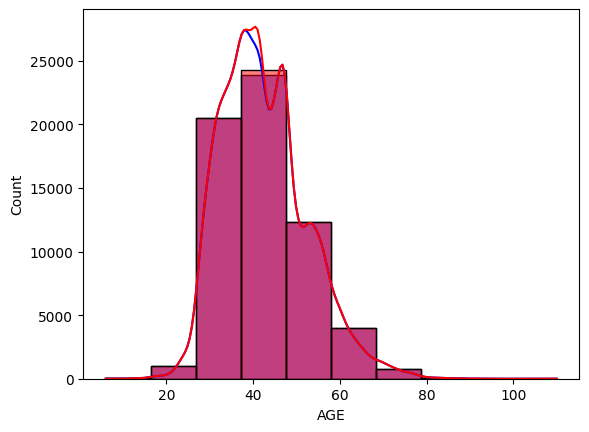

In [ ]:
# sebelum handling
sns.histplot(data = df_flight, x='AGE', color='blue', kde=True, bins=10)
# sesudah handling
sns.histplot(data = df_flight_clean, x='AGE', color='red', kde=True, bins=10)
plt.show()

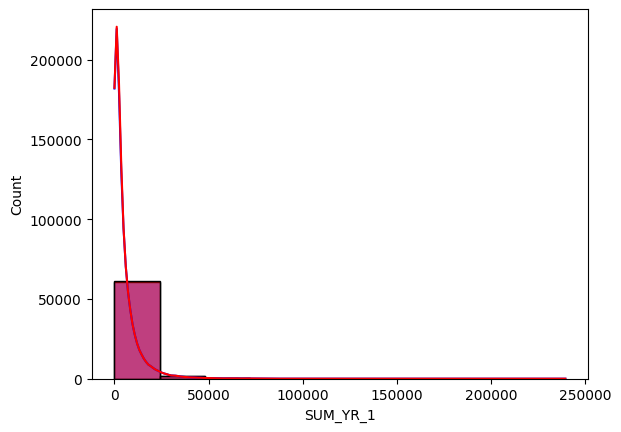

In [ ]:
# sebelum handling
sns.histplot(data = df_flight, x='SUM_YR_1', color='blue', kde=True, bins=10)
# sesudah handling
sns.histplot(data = df_flight_clean, x='SUM_YR_1', color='red', kde=True, bins=10)
plt.show()

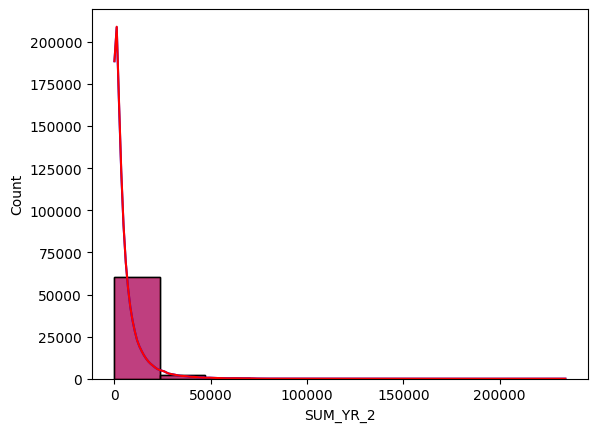

In [ ]:
# sebelum handling
sns.histplot(data = df_flight, x='SUM_YR_2', color='blue', kde=True, bins=10)
# sesudah handling
sns.histplot(data = df_flight_clean, x='SUM_YR_2', color='red', kde=True, bins=10)
plt.show()

setelah di cek data terlihat natural sebelum dan sesudah handling

## Outlier

Handling outlier pada kolom avg_discount

asumsi saya karena tidak mungkin ada avg discount sampai > 100% kasusnya kalau didata ini Max dari Avg_discount 1,5 atau 150% atau diskon 150% , artinya saya membatasai jumlah avg discount yang diterima customer sampai 100% saja, avg discount 100% saja menurut saya tidak masuk akal. kemungkinan salah input sehingga saya isi pakai median untuk avg_discount yang melebihi 100%

pada code dibawah ini:

In [ ]:
median_value = df_flight_clean.loc[df_flight_clean['avg_discount'] <= 1, 'avg_discount'].median()
df_flight_clean.loc[df_flight_clean['avg_discount'] > 1, 'avg_discount'] = median_value

cek  outlier pada kolom lain

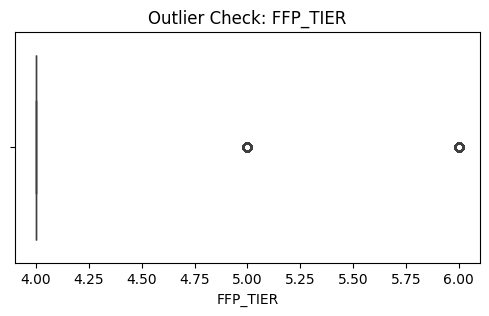

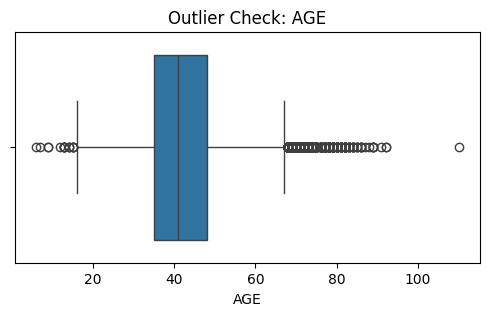

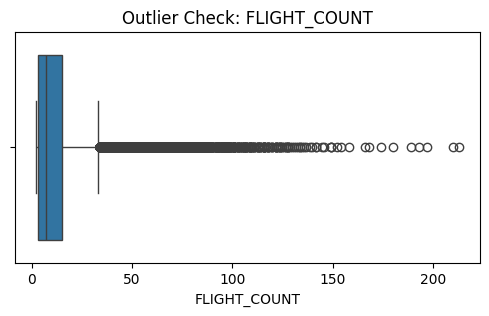

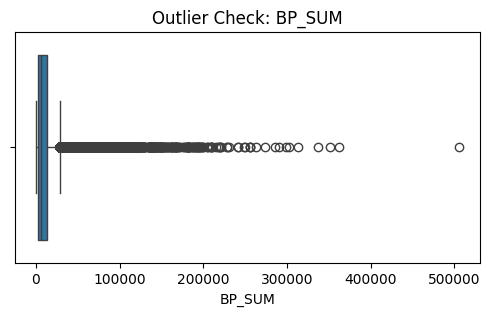

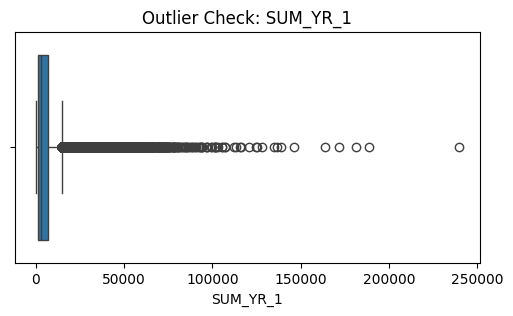

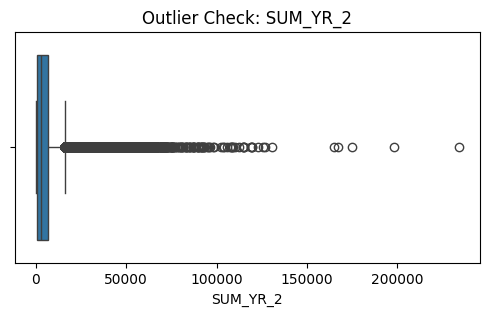

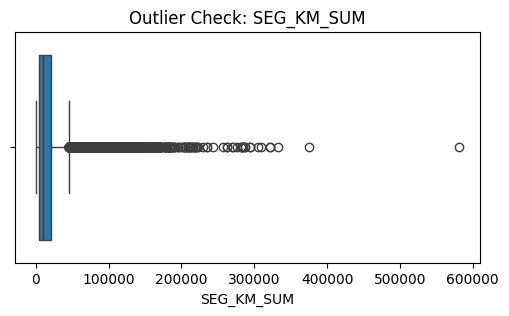

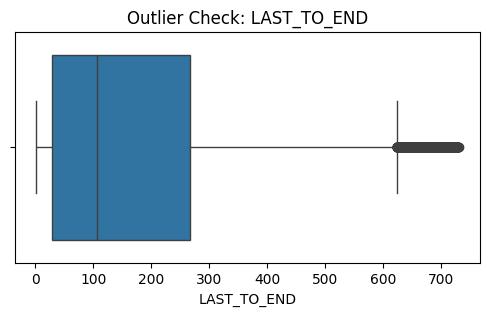

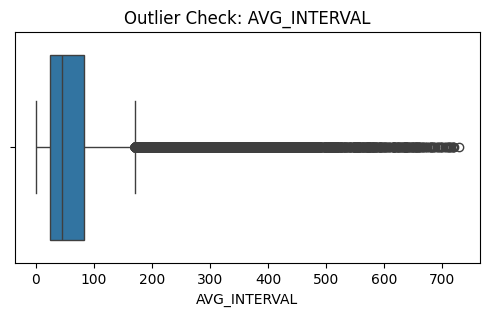

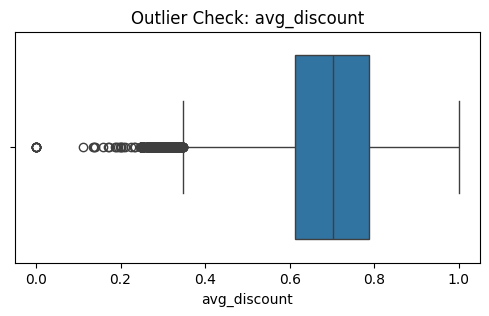

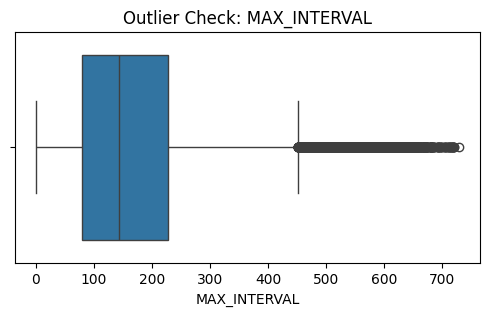

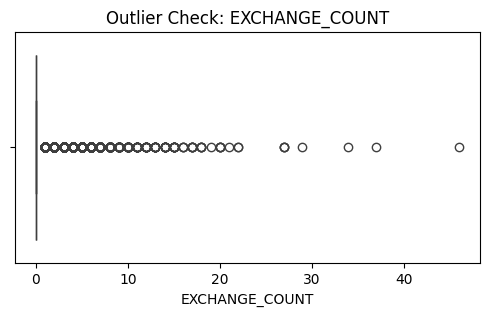

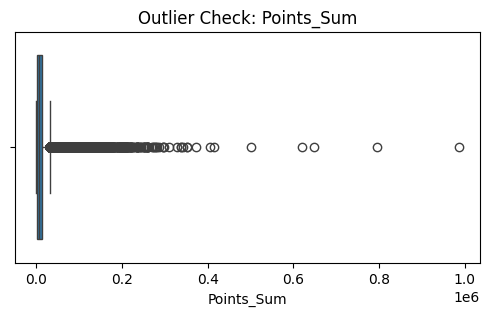

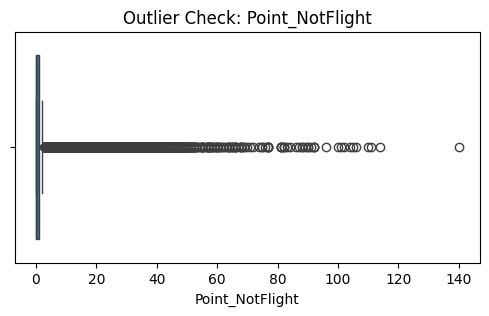

In [ ]:
num_cols = ['FFP_TIER','AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL',
            'avg_discount','MAX_INTERVAL', 'EXCHANGE_COUNT','Points_Sum', 'Point_NotFlight']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_flight_clean[col])
    plt.title(f'Outlier Check: {col}')
    plt.show()


handling outlier pakai log Tranformation

In [ ]:
# Mereduksi skewness pakai log
df_flight_clean['BP_SUM'] = np.log1p(df_flight_clean['BP_SUM'])
df_flight_clean['SUM_YR_1'] = np.log1p(df_flight_clean['SUM_YR_1'])
df_flight_clean['SUM_YR_2'] = np.log1p(df_flight_clean['SUM_YR_2'])
df_flight_clean['Points_Sum'] = np.log1p(df_flight_clean['Points_Sum'])
df_flight_clean['FLIGHT_COUNT'] = np.log1p(df_flight_clean['FLIGHT_COUNT'])
df_flight_clean['SEG_KM_SUM'] = np.log1p(df_flight_clean['SEG_KM_SUM'])

saya menggunakan log karena tidak ingin membuang kolom outlier berharga, karena melainkan mengurangi efeknya atau mengubah distribusinya sehingga outlier menjadi lebih mendekat ke data lainnya.

In [ ]:
df_flight_clean.describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000,62977.000000
mean,4.102180,42.465456,2.165926,8.591979,6.918692,6.714605,9.230859,176.074964,67.755098,166.056132,0.319831,0.696232,8.713907,2.728615
std,0.373886,9.852342,0.833836,1.394802,3.138547,3.369035,1.019579,183.780158,77.516091,123.391708,1.136096,0.140630,1.357762,7.364723
min,4.000000,6.000000,1.098612,0.000000,0.000000,0.000000,5.910797,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,35.000000,1.386294,7.831617,6.928538,6.666957,8.465689,29.000000,23.375000,79.000000,0.000000,0.612006,7.929126,0.000000
50%,4.000000,41.000000,2.079442,8.648572,7.937732,7.928046,9.209940,107.000000,44.666667,143.000000,0.000000,0.703391,8.753213,0.000000
75%,4.000000,48.000000,2.772589,9.459775,8.783549,8.828934,9.965194,267.000000,82.000000,228.000000,0.000000,0.788891,9.568364,1.000000
max,6.000000,110.000000,5.365976,13.132925,12.386563,12.363884,13.272021,731.000000,728.000000,728.000000,46.000000,1.000000,13.800978,140.000000


In [ ]:
# save untuk clustering
features = df_flight_clean.columns.tolist()

## Transformation

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_flight_clean)
scaled_df = pd.DataFrame(scaled, columns=features)
scaled_df.head()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,5.075970,-1.163738,3.820844,3.255647,1.742180,1.676837,3.963589,-0.952640,-0.829149,-1.199897,29.645775,1.887283,3.405029,6.418674
1,5.075970,-0.047244,3.337414,3.017476,1.635659,1.577243,3.294898,-0.919992,-0.807076,-1.208001,25.244702,0.050913,3.111010,4.110355
2,5.075970,-0.250243,3.294114,2.994727,1.620700,1.572864,3.261036,-0.898227,-0.805731,-1.199897,17.322771,0.050913,3.094155,3.159870
3,2.401338,2.185746,1.213831,2.965888,1.512073,1.491675,3.252788,-0.430273,-0.514626,-0.754158,9.400840,0.050913,3.029489,1.258901
4,5.075970,0.561754,3.435369,2.816435,1.533798,1.503730,3.347720,-0.930875,-0.812315,-0.964871,23.484273,1.951415,2.960262,4.925056


In [ ]:
scaled_df.describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,6.297700e+04,6.297700e+04,6.297700e+04,6.297700e+04,6.297700e+04,6.297700e+04,6.297700e+04,62977.000000,6.297700e+04,6.297700e+04,6.297700e+04,6.297700e+04,6.297700e+04,6.297700e+04
mean,-1.130063e-15,6.498763e-17,2.021837e-16,-5.199011e-16,-2.888339e-17,3.321590e-16,2.888339e-16,0.000000,-1.949629e-16,9.387103e-17,-1.047023e-16,3.032756e-16,4.043675e-16,-7.581891e-17
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-2.732943e-01,-3.701226e+00,-1.280015e+00,-6.160048e+00,-2.204443e+00,-1.993051e+00,-3.256332e+00,-0.952640,-8.740848e-01,-1.345775e+00,-2.815199e-01,-4.950826e+00,-6.417896e+00,-3.705009e-01
25%,-2.732943e-01,-7.577401e-01,-9.350022e-01,-5.451437e-01,3.136988e-03,-1.414312e-02,-7.504821e-01,-0.800283,-5.725321e-01,-7.055322e-01,-2.815199e-01,-5.989190e-01,-5.780000e-01,-3.705009e-01
50%,-2.732943e-01,-1.487430e-01,-1.037202e-01,4.057483e-02,3.246877e-01,3.601774e-01,-2.051756e-02,-0.375859,-2.978558e-01,-1.868547e-01,-2.815199e-01,5.091252e-02,2.894984e-02,-3.705009e-01
75%,-2.732943e-01,5.617536e-01,7.275617e-01,6.221695e-01,5.941832e-01,6.275819e-01,7.202385e-01,0.494753,1.837685e-01,5.020140e-01,-2.815199e-01,6.588895e-01,6.293182e-01,-2.347174e-01
max,5.075970e+00,6.854723e+00,3.837776e+00,3.255647e+00,1.742180e+00,1.676837e+00,3.963589e+00,3.019529,8.517588e+00,4.554182e+00,4.020835e+01,2.160064e+00,3.746689e+00,1.863919e+01


untuk scalling sudah saya pastikan mean = ~ 0 dan std = 1

sehingga bisa dilanjutkan untuk Clustering

## Eksploratory Data Analys

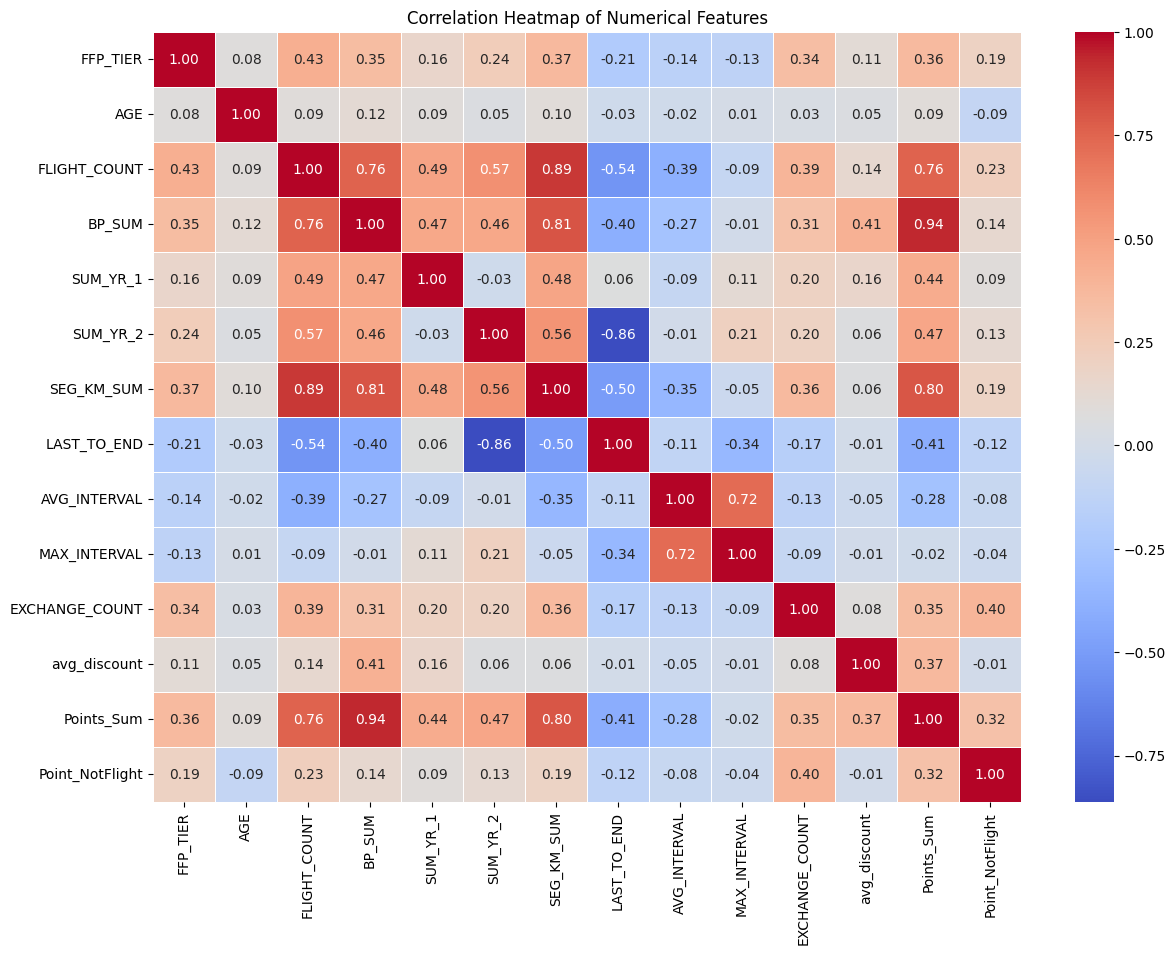

In [ ]:
correlation_matrix = df_flight_clean.corr()
# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Multicollinearity

In [ ]:
feature_medv = add_constant(scaled_df)

vif_df = pd.DataFrame([vif(feature_medv.values, i)
               for i in range(feature_medv.shape[1])],
              index = feature_medv.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,FFP_TIER,1.334336
2,AGE,1.033501
3,FLIGHT_COUNT,7.652690
4,BP_SUM,13.804602
5,SUM_YR_1,2.335681
6,SUM_YR_2,4.456556
7,SEG_KM_SUM,8.253419
8,LAST_TO_END,5.411825
9,AVG_INTERVAL,2.900890
10,MAX_INTERVAL,2.900638


| Fitur            | VIF      | Catatan dari Heatmap                                                |
| ---------------- | -------- | ------------------------------------------------------------------- |
| **FLIGHT_COUNT** | 7.65     | Korelasi tinggi (0.89) dengan SEG_KM_SUM                            |
| **BP_SUM**       | 13.80  | Sangat tinggi (0.94) dengan Points_Sum, juga 0.81 dengan SEG_KM_SUM |
| **Points_Sum**   | 13.23  | Sangat tinggi dengan BP_SUM (0.94) dan SEG_KM_SUM (0.80)            |
| **SEG_KM_SUM**   | 8.25   | Tinggi dengan FLIGHT_COUNT (0.89), BP_SUM (0.81), Points_Sum (0.80) |
| **SUM_YR_2**     | 4.46     | Negatif tinggi dengan LAST_TO_END (–0.86)                           |
| **LAST_TO_END**  | 5.41     | Negatif tinggi dengan SUM_YR_2 (–0.86)                              |
| **AVG_INTERVAL** | 2.90     | Korelasi sedang (0.72) dengan MAX_INTERVAL                          |
| **MAX_INTERVAL** | 2.90     | Sama seperti di atas                                                |


Berdasarkan hasil di atas:

Fitur dengan VIF > 5 dan/atau korelasi tinggi dihapus untuk menghindari redundansi informasi.

Fitur yang dipertahankan adalah yang memiliki hubungan moderat atau unik terhadap target analisis (perilaku pelanggan).

Select features yang nilai VIF > 5 untuk mengurangi Redundan

In [ ]:
selected_features = [
    'FFP_TIER',
    'AGE',
    'SEG_KM_SUM',
    'LAST_TO_END',
    'AVG_INTERVAL',
    'MAX_INTERVAL',
    'EXCHANGE_COUNT',
    'avg_discount',
    'Point_NotFlight',
    'SUM_YR_1'
]


In [ ]:
# final features untuk clustering
df_selected = scaled_df[selected_features].copy()

# Clustering menggunakan K-Means

Untuk menentukan jumlah Cluster terbaik kita bisa menggunakan

* Elbow Methode
* Silhouette Score dan
* CHI (calinski harabasz score)

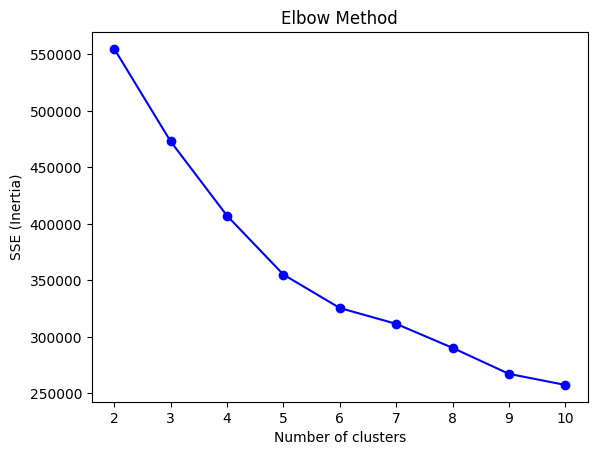

In [ ]:
# Elbow Method
sse = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected)
    sse.append(kmeans.inertia_)

plt.plot(K, sse, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.show()

Pada grafik Elbow Method, terjadi penurunan tajam pada nilai SSE (Sum of Squared Error) dari cluster 2 → 5, lalu mulai melandai setelahnya.

Ini menunjukkan bahwa titik “elbow” (titik perubahan signifikan) terjadi di **sekitar K = 5.**

In [ ]:
# Silhouette Score & calinski_harabasz_score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(df_selected)

    # Silhouette Score
    sil_score = silhouette_score(df_selected, preds)

    # Calinski-Harabasz Index
    chi_score = calinski_harabasz_score(df_selected, preds)

    print(f"Clusters = {k}, Silhouette Score = {sil_score:.4f}, CHI = {chi_score:.2f}")

Clusters = 2, Silhouette Score = 0.1413, CHI = 8506.16
Clusters = 3, Silhouette Score = 0.1878, CHI = 10444.33
Clusters = 4, Silhouette Score = 0.1954, CHI = 11475.46
Clusters = 5, Silhouette Score = 0.2397, CHI = 12175.57
Clusters = 6, Silhouette Score = 0.2521, CHI = 11768.38
Clusters = 7, Silhouette Score = 0.2266, CHI = 10720.43
Clusters = 8, Silhouette Score = 0.1897, CHI = 10519.10
Clusters = 9, Silhouette Score = 0.2003, CHI = 10674.24
Clusters = 10, Silhouette Score = 0.1989, CHI = 10115.39


Nilai tertinggi: **Silhouette Score** **K = 6 (0.2521)**
Artinya, struktur cluster paling jelas ketika dibagi 6 kelompok.

Nilai tertinggi: **Calinski-Harabasz Index (CHI)** **K = 5 (12175.57)**
Artinya, K = 5 memberi keseimbangan terbaik antara variasi antar dan dalam cluster.

Kombinasi terbaik antara Silhouette & CHI dan elbow: **K = 5, karena hasilnya seimbang** — baik dari sisi pemisahan cluster maupun stabilitas.

## Visualisasi Hasil Clustering

In [ ]:
# Gunakan k=5 berdasarkan analisis sebelumnya
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_selected)

In [ ]:
# Tambahkan hasil cluster ke dataframe
df_flight_clean['Cluster'] = cluster_labels
df_flight_clean.head()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Cluster
0,6,31.0,5.351858,13.132925,12.386563,12.363884,13.272021,1,3.483254,18,34,0.961639,13.337089,50,2
1,6,42.0,4.948760,12.800727,12.052245,12.028350,12.590243,7,5.194245,17,29,0.703391,12.937885,33,2
2,6,40.0,4.912655,12.768997,12.005296,12.013598,12.555718,11,5.298507,18,20,0.703391,12.915000,26,2
3,5,64.0,3.178054,12.728772,11.664367,11.740069,12.547309,97,27.863636,73,11,0.703391,12.827200,12,2
4,6,48.0,5.030438,12.520318,11.732551,11.780683,12.644099,5,4.788079,47,27,0.970658,12.733207,39,2


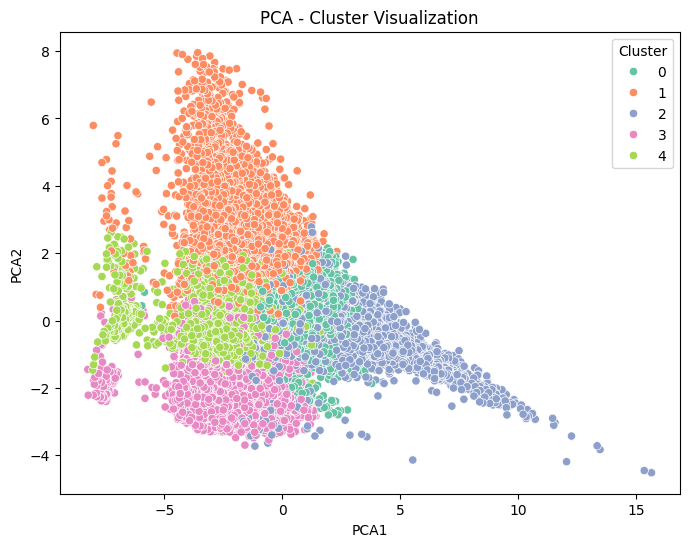

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

df_flight_clean['PCA1'] = pca_result[:, 0]
df_flight_clean['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_flight_clean, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('PCA - Cluster Visualization')
plt.show()

# Evaluasi model

In [ ]:
silhouette = silhouette_score(df_selected, cluster_labels)
print(f"Silhouette Score of Final Clustering Model: {silhouette:.4f}")

Silhouette Score of Final Clustering Model: 0.2397


In [ ]:
chi = calinski_harabasz_score(df_selected, cluster_labels)
print(f"Calinski-Harabasz Index (CHI): {chi:.2f}")

Calinski-Harabasz Index (CHI): 12175.57


Dua metode evaluasi digunakan untuk menentukan jumlah cluster yang paling optimal:

* **Silhouette Score** mengukur seberapa baik setiap data berada di dalam cluster-nya. Nilai tertinggi diperoleh saat k = 2 dengan skor sebesar **0.5191**, yang menunjukkan kualitas pemisahan cluster paling baik dibanding nilai k lainnya.

* Sementara itu, **Elbow Method** meninjau nilai Sum of Squared Errors (SSE) dan menunjukkan titik “elbow” pada **k = 4 atau k = 5**, di mana penurunan **SSE mulai melambat**.

Namun, karena Silhouette Score lebih menekankan pada kualitas pemisahan antar-cluster, maka jumlah **cluster optimal yang dipilih adalah k = 2**.

In [ ]:
cluster_summary = df_flight_clean.groupby('Cluster').mean().T.round(2)
print("Rangkuman Statistik (per Variabel):")
print(cluster_summary)

Rangkuman Statistik (per Variabel):
Cluster               0       1       2       3       4
FFP_TIER           4.00    4.01    5.18    4.00    4.02
AGE               43.21   41.55   44.58   41.61   41.07
FLIGHT_COUNT       2.61    1.52    3.57    1.49    1.58
BP_SUM             9.22    7.77   10.42    7.74    7.62
SUM_YR_1           8.43    6.70    9.22    7.81    0.02
SUM_YR_2           8.34    6.67    9.72    1.20    7.77
SEG_KM_SUM         9.78    8.48   10.73    8.41    8.56
LAST_TO_END       94.43  135.05   34.71  483.98  115.91
AVG_INTERVAL      51.64  210.71   22.40   39.97   46.47
MAX_INTERVAL     180.34  375.88  104.51   72.70   89.62
EXCHANGE_COUNT     0.29    0.06    2.10    0.04    0.05
avg_discount       0.70    0.68    0.75    0.70    0.66
Points_Sum         9.30    7.92   10.61    7.84    7.84
Point_NotFlight    2.56    1.79    9.95    1.25    2.12
PCA1               1.11   -1.48    4.25   -2.09   -1.47
PCA2               0.23    2.22   -0.70   -1.87    0.18


## Insight

Dua metode evaluasi digunakan untuk menentukan jumlah cluster yang paling optimal:

**Silhouette Score** mengukur seberapa baik setiap data berada di dalam cluster-nya.
Nilai tertinggi diperoleh saat **k = 5 dengan skor sebesar 0.2397**, yang menunjukkan tingkat pemisahan antar-cluster cukup baik namun masih terdapat tumpang tindih di beberapa area.

**Elbow Methode** meninjau nilai Sum of Squared Errors (SSE) dan menunjukkan titik “elbow” pada k = 4 atau **k = 5**, di mana penurunan SSE mulai melambat secara signifikan.

Selain itu, nilai **Calinski-Harabasz Index (CHI)** sebesar **12,175.57** juga menunjukkan bahwa variasi antar-cluster masih cukup baik.

**Kesimpulan:**
Berdasarkan hasil evaluasi tersebut, jumlah cluster yang paling optimal dipilih adalah **k = 5,** karena memberikan keseimbangan antara kualitas pemisahan cluster dan stabilitas struktur data.

## Rekomendasi

**Cluster 0 — Active Regular Members**

Ciri: Umur sedang (43), penerbangan cukup rutin (2–3 kali), poin tinggi, dan masih aktif (recency rendah).

**Interpretasi**: Pelanggan reguler aktif yang terbang beberapa kali setahun dan rutin mengumpulkan poin.

**Rekomendasi:**

Pertahankan loyalitas dengan promo penukaran poin.

Tawarkan upgrade tier atau benefit tambahan agar makin sering terbang.

**Cluster 1 — Low-Activity / Dormant Members**

Ciri: Flight count rendah, recency tinggi (lama tidak terbang), poin rendah, penukaran jarang.

**Interpretasi**: Pelanggan lama yang sudah jarang aktif atau mungkin berhenti menggunakan layanan.

**Rekomendasi:**

Lakukan re-engagement campaign seperti diskon khusus untuk penerbangan pertama setelah hiatus.

Kirim email reminder “welcome back” dengan poin bonus untuk penerbangan berikutnya.

**Cluster 2 — High-Value Frequent Flyers**

Ciri: Flight count tertinggi, poin dan jarak terbang tertinggi, sering menukar poin, recency rendah (aktif).

**Interpretasi**: Ini adalah pelanggan VIP atau loyal premium flyers.

**Rekomendasi:**

Beri prioritas layanan dan reward eksklusif (akses lounge, upgrade kursi).

Jaga retensi dengan program loyalitas personalisasi dan benefit eksklusif (tier bonus, anniversary rewards).

**Cluster 3 — Inactive / Churned Members**

Ciri: Recency sangat tinggi (483 hari), flight count rendah, poin hampir tidak digunakan.

**Interpretasi :** Pelanggan sudah tidak aktif atau hampir “churn”.

**Rekomendasi:**

Kirim survey alasan tidak aktif.

Berikan penawaran comeback, misalnya “terbang 1x dapat 2x poin”.

Fokus ke strategi recovery dan retargeting.

**Cluster 4 — Discount-Oriented Members**

Ciri: Aktivitas sedang, poin tidak terlalu tinggi, diskon rendah, namun masih ada potensi terbang.

**Interpretasi:** Segmen pelanggan sensitif terhadap harga — mereka terbang jika ada promo.

**Rekomendasi:**

Dorong konversi dengan flash sale atau program “price alert”.

Gunakan personalized discount untuk rute favorit mereka.